# S07T01: Tasca del test d'hipòtesis
Aprèn a realitzar test d'hipòtesis amb Python.
## - Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

<font color='blue'>For this exercise we'll use a dataset called 'fifa22' which gathers data about all the male soccer players in the top professional leagues worldwide. To center the study, we'll focus on the Spanish LaLiga. Let's start by loading the dataframe:

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st

fifa = pd.read_csv(r'fifa22.csv')
fifa.sample()

C:\Users\pacressa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
165,202884,https://sofifa.com/player/202884/leonardo-spin...,L. Spinazzola,Leonardo Spinazzola,"LWB, LB, LM",83,83,33000000.0,72000.0,28,...,76+3,76+3,76+3,81+2,21+3,https://cdn.sofifa.net/players/202/884/22_120.png,https://cdn.sofifa.net/teams/52/60.png,https://cdn.sofifa.net/flags/it.png,NaN,https://cdn.sofifa.net/flags/it.png


<font color='blue'>Let's simplify a little the dataframe by keeping only relevant attributes and LaLiga players:

In [84]:
cols = ["short_name", "player_positions","overall","wage_eur","age","dob","height_cm","weight_kg","club_name",
        "league_name","nationality_name","preferred_foot","weak_foot","skill_moves","pace","shooting","passing",
        "dribbling","defending","physic","club_position"]
fifa.drop(fifa.columns.difference(cols), axis=1, inplace=True)
fifa = fifa[fifa["league_name"]=="Spain Primera Division"]
fifa.dropna(inplace=True)
fifa.reset_index(inplace=True)
fifa.drop("index", axis=1, inplace=True)
fifa.sample()

,short_name,player_positions,overall,wage_eur,age,dob,height_cm,weight_kg,club_name,league_name,...,nationality_name,preferred_foot,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic
111,Manu Trigueros,"CM, RM, LM",79,39000.0,29,1991-10-17,178,75,Villarreal CF,Spain Primera Division,...,Spain,Right,4,4,56.0,71.0,78.0,78.0,70.0,67.0


<font color='blue'>Now let's say we are the organizers of the 2022-23 season of LaLiga, and we want to make sure that LaLiga becomes the most athletic league in the world. To measure it, we'll focus on the <b>"pace"</b> attribute, and we'll aim to an average of at least 75. Let's try to figure out if the current average pace of our soccer league population is above or not the target of 75:

In [85]:
len(fifa.index)

567

<font color='blue'>It looks like the number of the population is too big to calculate the whole average, and we don't have a laptop available... Let's get a sample of 50 players and draw conclusions from there. To do so, we'll use the <b>simple random sampling</b> method:

C:\Users\pacressa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    50.000000
mean     68.360000
std      11.162547
min      36.000000
25%      62.250000
50%      69.500000
75%      76.000000
max      87.000000
Name: pace, dtype: float64
median    69.5
mode    66.0


Text(94.0, 0.023, 'std: 11.16')

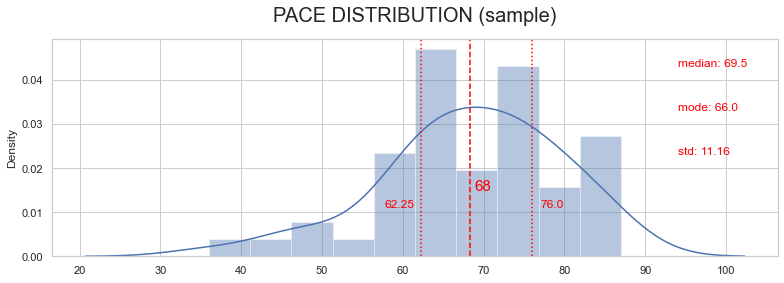

In [86]:
import statistics as stats
#sampling
sample = fifa.sample(50, replace=True, random_state=42)
paces = sample.pace

#plotting
sns.set_style("whitegrid")
ax1 = sns.distplot(x=paces, bins=10, kde=True, )    #grafic
sns.set(rc={"figure.figsize":(13, 4)}) #width=3, #height=4
plt.title("PACE DISTRIBUTION (sample)", fontsize=20, y=1.05)

#creation of parameters
def describe(dataframe):
    x = dataframe.describe()
    return x[1],x[2],x[4],x[5],x[6],x[0]

mean, std, q1, median, q3, n = describe(paces)
mode = stats.mode(paces)

print(paces.describe())
print("median   ", median)
print("mode   ", mode)

#creation of annotations and labels
plt.axvline(mean, 0 ,1, ls='--', c='red')    # mean
plt.axvline(q1, 0 ,1, ls=':', c='red')   # Q1
plt.axvline(q3, 0 ,1, ls=':', c='red')   # Q2
ax1.annotate(q1, xy=(q1-4.5,0.011), color='red')
ax1.annotate(int(mean), xy=(mean+0.5,0.015), color='red', fontsize=15)
ax1.annotate(q3, xy=(q3+1,0.011), color='red')
m= "median: "+str(median)
ax1.annotate(m, xy=(q3+18,0.043), color='red')
m= "mode: "+str(mode)
ax1.annotate(m, xy=(q3+18,0.033), color='red')
m= "std: "+str(round(std, 2))
ax1.annotate(m, xy=(q3+18,0.023), color='red')

<font color='blue'>Apparently the distribution of the sample responds to an approximate <b>Normal distribution</b>. The key parameters are the <b>sample mean of 68.36</b> and <b>sample standard deviation of 11.16</b>. <br><br>The data we have at hand is the one coming from the sample. It's a shame we don't have it from the population, but there's still hope! We can draw approximated calculations from the sample following the <b>hypothesis testing method</b>:<br>
1. Set hypothesis:<br>
    <b>H(null) :</b> μ = 75    <br>
    <b>H(1) :</b> μ > 75  <br><br>
2. Alpha: <br>
    We'll set an alfa of <b>0.05</b>  as significance threshold.  <br><br>
3. Sample statistics:<b> -4.2 </b>

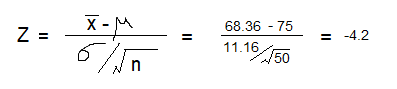

<font color='blue'>4. Critical value:<br>
    Since the sample size is greater than 30, we use the Z-table to find it: <b>-1.645</b><br><br>
5. We can see that the Z value -4.2 lays below the critical point of -1.645. Then we can conclude that <b>the null hypothesis can be rejected</b> meaning that most likely the population mean is not beyond the 75 objective we have set.

## P-value approach:
<font color='blue'>If we had a laptop available, we could've used it to calculate the P-value and follow the p-value approach to reach to the same conclusion:

In [87]:
st.ttest_1samp(paces, 75)

Ttest_1sampResult(statistic=-4.206198773846341, pvalue=0.00011006707248470678)

<font color='blue'>After calculating the <b>P-value</b>, we see its value is <b>0.01%</b>, way under the alpha of 5%. This confirms that the <b>we can reject the null hypothesis</b>. In other words, the actual population mean must be much lower than the pace target of 70. <br><br>We can get rid of any doubt by actually calculating the mean of the whole population:

In [88]:
fifa.pace.mean()

69.57495590828924

<font color='blue'>Effectively, the mean of the population was much lower than the 75 we are aiming for. The mean of the sample before (68.36), did reflect well the population mean. <br><br>For us, this means that our Spanish league's average pace is still to low and we'll prompt the coaches of all teams to make an extra effort and improve the physical trainings in order to better this stat.

## - Exercici 2
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.<br><br>
<font color='blue'>In order to increase the pace of the players of the Spanish League, the organizers have the gut feeling that it must be due to average excessive weight. To do so, they'll take the same sample of 50 players, and try to figure out if there's a linear relationship between "<b>pace</b>" and "<b>weights</b>", and try to conclude if the result can be extrapolated to the whole population:

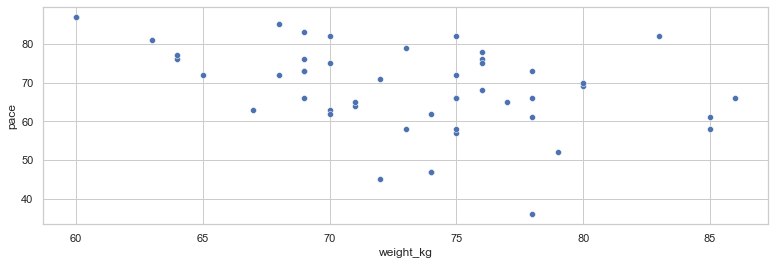

In [120]:
weights = sample.weight_kg
sns.set_style("whitegrid")
ax1 = sns.scatterplot(x=weights, y=paces)    #grafic

<font color='blue'>With the naked eye, based on the sample it seems that there could slightly be a correlation, where the players with more weight run slower than the lighter. Let's double check it with the test "<b>Pearson’s Correlation Coefficient</b>": <br><br>
Hipotesis:<br>

- H(null) : "pace" and "weights" = independent <br>
- H(1) : "pace" and "weights" ≠ independent <br>
- Significance: 0.05

In [90]:
from scipy.stats import pearsonr
stat, p = pearsonr(paces, weights)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=-0.404, p=0.004
Probably dependent


<font color='blue'>After carrying out the test, the p-value resulted in 0.4%, way lower than the 5% minimum to back up the null hypothesis. This means we <b>can reject the null hypothesis</b>, so that the attributes "pace" and "weights" must be correlated.

## - Exercici 3
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

<font color='blue'>So now it seems we have a clue about the general cause of the mean pace of our league being so slow: some players have overweight! We need to inform the coaches and start working hard to lose weight. <br><br>But before we start, we want to make sure this is an issue spread across all the teams in the league. So we assume that all the teams share the same mean weight. To prove it, we'll follow the <b>cluster sampling method</b> and take as samples three teams very different size-wise: FC Barcelona, Real Sociedad and Elche CF. Then we'll run an <b>Analysis of variance test (ANOVA)</b> that will calculate the p-value of all three having roughly the same mean:

<font color='blue'>Hipotesis:<br>

- H(null) : the means of the samples are equal <br>
- H(1) : one or more of the means of the samples are unequal <br>
- Significance: 0.05

In [122]:
 #filtering only the 3 clubs
clubs = fifa[fifa.club_name.isin(["FC Barcelona","Real Sociedad","Elche CF"])]
fcb_w = clubs[clubs.club_name=="FC Barcelona"].weight_kg
rsc_w = clubs[clubs.club_name=="Real Sociedad"].weight_kg
elx_w = clubs[clubs.club_name=="Elche CF"].weight_kg

#launching the test
from scipy.stats import f_oneway
stat, p = f_oneway(fcb_w, rsc_w, elx_w)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=2.419, p=0.096
Probably the same distribution


<font color='blue'>Finally we got the <b>p-value</b>, which is <b>9.6%</b>. This means the null hypothesis is reforced and we can assure with a 5% significance level that the weight means of these teams are indeed very similar. Let's see it with a plot and calculating the means directly:


74.17391304347827
75.57692307692308


Text(50, 7, 'Elche CF mean: 75.58')

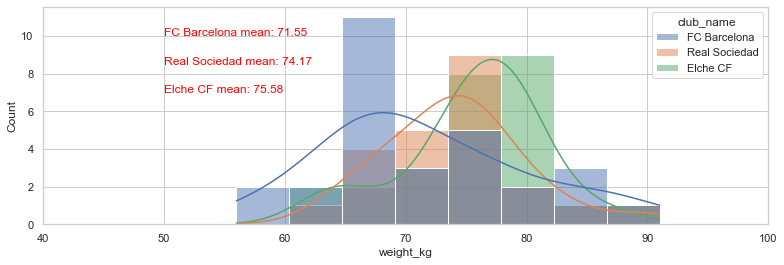

In [134]:
#plots
plt.figure(figsize=(13, 4))
sns.set_style("whitegrid")
ax = sns.histplot(data=clubs, x='weight_kg', hue='club_name', kde=True)
ax.set_xlim(40,100)

#annotations
print()
print(rsc_w.mean())
print(elx_w.mean())
m= "FC Barcelona mean: "+str(round(fcb_w.mean(),2))
ax.annotate(m, xy=(50,10), color='red')
m= "Real Sociedad mean: "+str(round(rsc_w.mean(),2))
ax.annotate(m, xy=(50, 8.5), color='red')
m= "Elche CF mean: "+str(round(elx_w.mean(),2))
ax.annotate(m, xy=(50, 7), color='red')

<font color='blue'>It does look like the weights across the teams are similar, not exact but all are around the 71-75 kgs.<br>Now thanks to this tests, we have a pretty safe hint that the issue of slow paces in our league is coming from a high weight which is most likely spread across all the teams.<br><br>Let's give a call to the coaches and get these players sweating!